In [7]:
!pip install duckduckgo-search

In [8]:
from fastcore import *
from fastai.vision.all import *
from duckduckgo_search import ddg_images
from fastdownload import download_url

In [9]:
im_url = ddg_images('road bike', region='uk-en', max_results=1)[0]['image']

In [10]:
im_url

'https://www.bicycleretailer.com/sites/default/files/images/article/ESX_34_Short_ENVE_1.jpg'

In [11]:
path = download_url(im_url, dest='/root/bikes/bike.jpg')

In [12]:
path

Path('/root/bikes/bike.jpg')

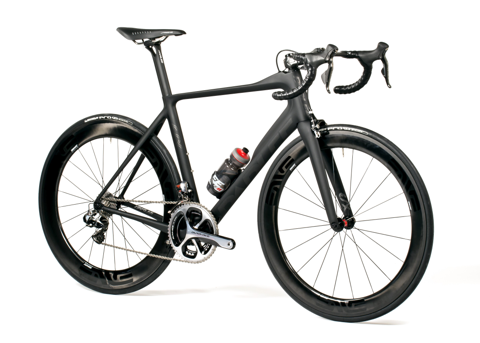

In [13]:
im = PILImage.create(path)
im.to_thumb(480)

In [14]:
def get_image_urls(term, n=30):
    res = ddg_images(term, region='uk-en', max_results=n)
    res = [r['image'] for r in res]
    return res

In [8]:
get_image_urls('road_bike', n=2)

['https://www.bicycleretailer.com/sites/default/files/images/article/ESX_34_Short_ENVE_1.jpg',
 'https://keyassets.timeincuk.net/inspirewp/live/wp-content/uploads/sites/2/2018/02/ultra-900-aluminium-frame-road-bike-black-grey-yellow-1.jpg']

In [9]:
path = Path('/root/bikes/train/')

In [10]:
def search_and_download_images(term, path, n=30):
    urls = get_image_urls(term, n)
    folder = term.replace(' ', '_')
    dest = path/folder
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=urls)
    resize_images(dest, max_size=400, dest=dest)

In [11]:
search_and_download_images('road bike', path, 50)

In [12]:
search_and_download_images('gravel bike', path, 50)

In [13]:
path.ls()

(#2) [Path('/root/bikes/train/road_bike'),Path('/root/bikes/train/gravel_bike')]

In [14]:
(path/'road_bike').ls()

(#141) [Path('/root/bikes/train/road_bike/8052c19a-33ba-4e93-8fe3-0a6a855326cc.jpeg'),Path('/root/bikes/train/road_bike/06f8f974-acd7-4aa9-8f08-12beb18283b2.jpg'),Path('/root/bikes/train/road_bike/dd6a96da-182c-482f-8668-584f263e6fab.jpg'),Path('/root/bikes/train/road_bike/e6e18f34-b358-4a7c-bd11-7f175e10ca44.jpg'),Path('/root/bikes/train/road_bike/d5d96340-aa2e-4832-8cb8-12869bf93405.jpg'),Path('/root/bikes/train/road_bike/0d5607e6-262e-4952-839c-041e877a82fe.JPG'),Path('/root/bikes/train/road_bike/629407d5-eaba-48b2-be65-40dadac4c8e3.jpg'),Path('/root/bikes/train/road_bike/26b42e70-f16f-4359-80dd-896ff2eb9a4a.jpg'),Path('/root/bikes/train/road_bike/ac3ad999-5df2-42b3-a21d-87c62c33b219.jpg'),Path('/root/bikes/train/road_bike/4d44ed91-e33f-4d1a-b949-25bf926834b0.jpg')...]

In [15]:
(path/'gravel_bike').ls()

(#144) [Path('/root/bikes/train/gravel_bike/9d403702-6c52-4d7e-8755-cb098a1fd9c8.jpg'),Path('/root/bikes/train/gravel_bike/1e6273cb-177a-418b-93f5-571b3d32e3b8.jpg'),Path('/root/bikes/train/gravel_bike/33a1a277-e572-4a55-999e-438c3b07bdc0.jpg'),Path('/root/bikes/train/gravel_bike/6a93464e-7b1e-434b-af16-7fb50286ee2a.jpg'),Path('/root/bikes/train/gravel_bike/54506d69-4601-4bb2-98bd-4ac9b96eeddd.jpg'),Path('/root/bikes/train/gravel_bike/cfd4f796-d72e-454f-84bd-6494cc254de0.jpg'),Path('/root/bikes/train/gravel_bike/63e6f86d-7d8a-48c8-9302-1aaa3e8a2245.jpg'),Path('/root/bikes/train/gravel_bike/7e3534cb-b24f-4d75-8c13-9fd557639d89.jpg'),Path('/root/bikes/train/gravel_bike/ea4f62f2-f4b7-43ba-978a-82d389f70f78.jpg'),Path('/root/bikes/train/gravel_bike/7328ed1c-35aa-480f-a473-32aab2b23fc7.jpg')...]

In [16]:
PILImage.create((path/'road_bike').ls()[0]).size

(400, 400)

In [17]:
dblock = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(480, method=ResizeMethod.Crop),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

In [18]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 282 items
2 datasets of sizes 226,56
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/bikes/train/gravel_bike/836090e5-4003-4227-a03d-716ac357758d.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=400x271
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/bikes/train/gravel_bike/836090e5-4003-4227-a03d-716ac357758d.jpg
    applying parent_label gives
      gravel_bike
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=400x271, TensorCategory(0))


Found 282 items
2 datasets of sizes 226,56
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_

In [19]:
dls = dblock.dataloaders(path)

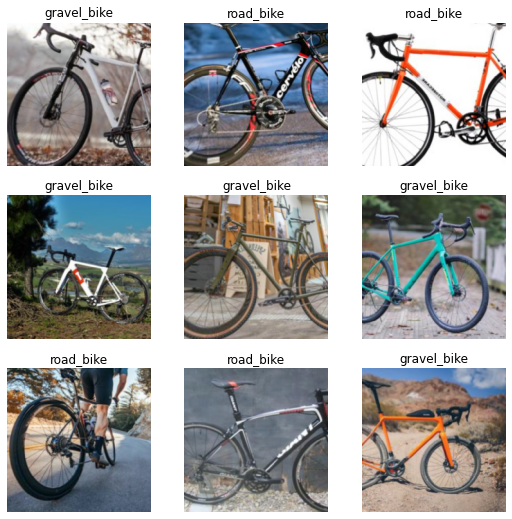

In [20]:
dls.show_batch()

In [21]:
learner = vision_learner(dls, resnet18, metrics=accuracy)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
learner.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.054446,0.888890,0.625000,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.499430,0.588198,0.732143,00:02
1,0.480590,0.274868,0.857143,00:02
2,0.424669,0.090741,0.982143,00:02
3,0.341848,0.025487,1.000000,00:02
4,0.285904,0.014908,1.000000,00:02
5,0.237803,0.005055,1.000000,00:02
6,0.202326,0.001861,1.000000,00:02
7,0.173800,0.000905,1.000000,00:02
8,0.151245,0.000707,1.000000,00:02
9,0.135656,0.000570,1.000000,00:02


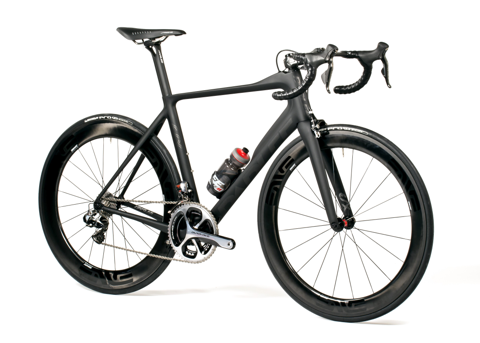

In [23]:
im.to_thumb(480)

In [24]:
learner.predict(im)

('road_bike', TensorBase(1), TensorBase([0.0063, 0.9937]))

In [25]:
url = 'https://thumbnails.mtb-news.de/cache/1200_640_1_1_0/9c/aHR0cHM6Ly93d3cubXRiLW5ld3MuZGUvbmV3cy93cC1jb250ZW50L3VwbG9hZHMvMjAyMi8xMS80YTBlYjM5NDI2MTBiZDE3MjQzOTdiMmEzYzRhODVkMzU0M2FjOGI4LmpwZw.jpg'

download_url(url, dest='/root/bikes/gravel.jpg')

Path('/root/bikes/gravel.jpg')

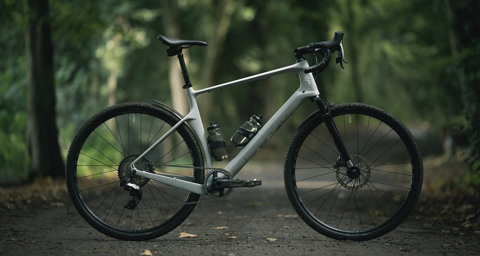

In [26]:
PILImage.create('/root/bikes/gravel.jpg').to_thumb(480)

In [27]:
learner.predict(PILImage.create('/root/bikes/gravel.jpg'))

('gravel_bike', TensorBase(0), TensorBase([9.9994e-01, 6.1290e-05]))

In [28]:
learner.export('model.pkl')